# Text Classification Using Manual Features and Traditional Machine Learning Models
These examples are taken from the NLTK Manual
https://www.nltk.org/book/ch06.html

In this example, we will extract manual features such as the first and last letter of a name and use them in a Naive Bayes classifier.
https://scikit-learn.org/stable/modules/naive_bayes.html

First, load the names dataset and prepare the training data.


In [50]:
import nltk
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)

## Load the data

In [51]:
# Load the data
from nltk.corpus import names
nltk.download("names") # Only need to run this once

# Annotate the data based on the text file they come from (male vs. female)
labeled_names = ([(name, "male") for name in names.words("male.txt")] + 
                 [(name, "female") for name in names.words("female.txt")])

# Shuffle the data
random.shuffle(labeled_names)

for i in range(10):
    print(labeled_names[i])

('Lissie', 'female')
('Danya', 'female')
('Welby', 'male')
('Antone', 'male')
('Bert', 'female')
('Erek', 'male')
('Gayleen', 'female')
('Rory', 'female')
('Donelle', 'female')
('Felicle', 'female')
[nltk_data] Downloading package names to /home/sebastian/nltk_data...
[nltk_data]   Package names is already up-to-date!


## Extract Features from the Text

These will be manually extracted features. We'll use the first and last letter of each name, but you should feel free to modify these and see if you can get better accuracy.

In [52]:
def gender_features(name):
    """ Extracts features from the word """
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    return features

labeled_features = [(gender_features(n), name) for (n, name) in labeled_names]

for i in range(10):
    print(labeled_features[i])

({'first_letter': 'l', 'last_letter': 'e'}, 'female')
({'first_letter': 'd', 'last_letter': 'a'}, 'female')
({'first_letter': 'w', 'last_letter': 'y'}, 'male')
({'first_letter': 'a', 'last_letter': 'e'}, 'male')
({'first_letter': 'b', 'last_letter': 't'}, 'female')
({'first_letter': 'e', 'last_letter': 'k'}, 'male')
({'first_letter': 'g', 'last_letter': 'n'}, 'female')
({'first_letter': 'r', 'last_letter': 'y'}, 'female')
({'first_letter': 'd', 'last_letter': 'e'}, 'female')
({'first_letter': 'f', 'last_letter': 'e'}, 'female')


## Encode the Features for a Statistical Classifier

In [53]:
# Convert the features to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X = [[f[key] for key in f] for (f, _) in labeled_features]
X_encoded = encoder.fit_transform(X)

# Labels are a binary output: 0 for male, 1 for female
y = np.array([0 if gnd=="male" else 1 for (_, gnd) in labeled_features])
names = [n for (n, _) in labeled_names]

print("Encoded one-hot features")
print(X_encoded)
print("Shape: {}".format(X_encoded.shape))
print("")
print("Binary classification labels")
print(y)
print("Shape: {}".format(y.shape))

Encoded one-hot features
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: (7944, 52)

Binary classification labels
[1 1 0 ... 1 1 1]
Shape: (7944,)


## Create, Train, and Evaluate a Naive Bayes Classifier

In [54]:
# Split the data into training and test sets. 
# Remember that the data was already shuffled, so we can just pick a cutoff index 
# where everything before is training data and everything after is test data.
cutoff_idx = 5000
X_train = X_encoded[:cutoff_idx]
y_train = y[:cutoff_idx]
names_train = names[:cutoff_idx]
X_test  = X_encoded[cutoff_idx:]
y_test  = y[cutoff_idx:]
names_test  = names[cutoff_idx:]

# Create and train a Categorical Naive Bayes classifier model
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Evaluate the Model

Below are a few ways to view the results

Training Accuracy: 3908/5000 = 78.16%
Test Accuracy: 2266/2944 = 76.97%


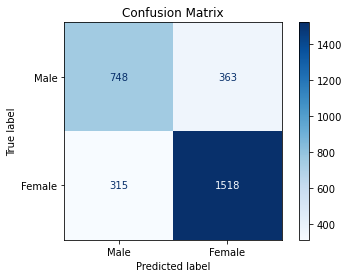


Example predictions
Name: Kimmi	Actual: female	Predicted: female
Name: Gustie	Actual: female	Predicted: female
Name: Wolf	Actual: male	Predicted: male
Name: Gardener	Actual: male	Predicted: male
Name: Chiarra	Actual: female	Predicted: female
Name: Verne	Actual: male	Predicted: female
Name: Kimberly	Actual: female	Predicted: female
Name: Aleta	Actual: female	Predicted: female
Name: Jenna	Actual: female	Predicted: female
Name: Damian	Actual: male	Predicted: male


In [55]:
# Calculate accuracy
num_train = len(y_train)
num_correct_train = np.sum(y_train == y_pred_train) 
train_acc =  100 * num_correct_train / num_train
print("Training Accuracy: {}/{} = {:.2f}%".format(
    num_correct_train, num_train, train_acc))
num_test = len(y_test)
num_correct_test = np.sum(y_test == y_pred_test) 
test_acc = 100 * num_correct_test / num_test
print("Test Accuracy: {}/{} = {:.2f}%".format(
    num_correct_test, num_test, test_acc))

# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=["Male","Female"],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

# Print a few examples
print("\nExample predictions")
for i in np.random.randint(len(y_test), size=10):
    actual = "male" if y_test[i]==0 else "female"
    pred = "male" if y_pred_test[i]==0 else "female" 
    print("Name: {}\tActual: {}\tPredicted: {}".format(
        names_test[i], actual, pred))